# Projeto PontUau pt.2 - Análise Exploratória e Manipulação dos Dados de Voo Regular Ativo (VRA) Extraídos da Agência Nacional de Aviação Civil (ANAC)

## Origem dos dados

Notebook anterior à esse: **LINK PARA A LOCALIZACAO DE TAL ARQUIVO NO REPOSITÓRIO DO GITHUB**

## Objetivo do Notebook

Este Notebook tem como objetivo a **Exploração** e o **Tratamento** dos **Dados** para facilitar a **Manipulação** das informações.

Ou seja, este trabalho visa identificar padrões, consertar possíveis erros e construir linhas de raciocínio próprias para contribuir com a criação de novas variáveis, bem como com o posterior treinamento do modelo (Machine Learning).

## Descrição do Projeto



A pontualidade dos voos é um fator crítico para a eficiência operacional do setor aéreo e para a experiência dos passageiros. Atrasos na partida podem gerar efeitos em cascata, impactando conexões, custos operacionais e a percepção de qualidade do serviço.

Por isso, este trabalho visa analisar dados de voos **nacionais** com foco na identificação de padrões associados a atrasos na partida.

Por meio de Análise Exploratória de Dados (EDA) e técnicas estatísticas, busca-se compreender quais fatores temporais e operacionais influenciam a ocorrência de atrasos, bem como criar e validar variáveis que possam ser utilizadas no modelo de Machine Learning.

Os insights obtidos nesta etapa servem de base para a construção de um modelo de classificação capaz de estimar, antes da realização do voo, a probabilidade de atraso, apoiando a tomada de decisão operacional e estratégica.


## Processo

### Importando Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configura para mostrar todas as colunas sem truncar
pd.set_option('display.max_columns', None)

# Configurações de visualização
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


### Carregamento e Exploração Inicial dos Dados

In [ ]:
# Atribuindo uma variável para cada dataset
vra_2023 = pd.read_parquet('/content/vra_2023.parquet')
vra_2024 = pd.read_parquet('/content/vra_2024.parquet')
vra_2025 = pd.read_parquet('/content/vra_2025.parquet')

In [ ]:
# Unindo os datasets
vra = pd.concat([vra_2023, vra_2024, vra_2025], ignore_index=True)

In [ ]:
# Identificando se foram concatenados

In [ ]:
# Visualizando primeiros registros do dataset
vra.head()

,icao_empresa_aerea,numero_voo,codigo_autorizacao_di,codigo_tipo_linha,icao_aerodromo_origem,icao_aerodromo_destino,partida_prevista,partida_real,chegada_prevista,chegada_real,situacao_voo,codigo_justificativa
0,AAL,0974,0,I,SBGL,KJFK,2023-01-09 23:00:00,None,2023-01-10 09:10:00,None,CANCELADO,NaN
1,AAL,0974,0,I,SBGL,KJFK,2023-01-12 23:00:00,None,2023-01-13 09:10:00,None,CANCELADO,NaN
2,AAL,0974,2,X,SBGL,KJFK,None,2023-01-13 22:59:00,None,2023-01-14 08:24:00,REALIZADO,NaN
3,AAL,0974,0,I,SBGL,KJFK,2023-01-14 23:00:00,None,2023-01-15 09:10:00,None,CANCELADO,NaN
4,AAL,0974,2,X,SBGL,KJFK,None,2023-01-15 22:59:00,None,2023-01-16 08:44:00,REALIZADO,NaN


In [ ]:
# Visualizando últimos registros do dataset
vra.tail()

,icao_empresa_aerea,numero_voo,codigo_autorizacao_di,codigo_tipo_linha,icao_aerodromo_origem,icao_aerodromo_destino,partida_prevista,partida_real,chegada_prevista,chegada_real,situacao_voo,codigo_justificativa
2887041,TAM,8106,0,I,SBGL,SCEL,2025-09-05 12:50:00,2025-09-05 12:50:00,2025-09-05 17:40:00,2025-09-05 17:54:00,REALIZADO,NaN
2887042,TAM,8106,0,I,SBGL,SCEL,2025-09-06 12:50:00,2025-09-06 12:44:00,2025-09-06 17:40:00,2025-09-06 17:50:00,REALIZADO,NaN
2887043,TAM,8106,0,I,SBGL,SCEL,2025-09-07 12:50:00,2025-09-07 12:43:00,2025-09-07 17:40:00,2025-09-07 17:37:00,REALIZADO,NaN
2887044,TAM,8106,0,I,SBGL,SCEL,2025-09-08 12:50:00,2025-09-08 12:42:00,2025-09-08 17:40:00,2025-09-08 17:25:00,REALIZADO,NaN
2887045,TAM,8106,0,I,SBGL,SCEL,2025-09-10 12:50:00,2025-09-10 13:25:00,2025-09-10 17:40:00,2025-09-10 18:23:00,REALIZADO,NaN


In [ ]:
# Visualizando o nome das colunas, os números de linhas e colunas, e também quais são os tipos de dados do dataset
vra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2887046 entries, 0 to 2887045
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   icao_empresa_aerea      object 
 1   numero_voo              object 
 2   codigo_autorizacao_di   object 
 3   codigo_tipo_linha       object 
 4   icao_aerodromo_origem   object 
 5   icao_aerodromo_destino  object 
 6   partida_prevista        object 
 7   partida_real            object 
 8   chegada_prevista        object 
 9   chegada_real            object 
 10  situacao_voo            object 
 11  codigo_justificativa    float64
dtypes: float64(1), object(11)
memory usage: 264.3+ MB


### Tratamento de Valores Nulos e Duplicados

In [ ]:
# Verificando dados nulos
vra.isnull().sum()

,0
icao_empresa_aerea,0
numero_voo,0
codigo_autorizacao_di,0
codigo_tipo_linha,474
icao_aerodromo_origem,0
icao_aerodromo_destino,0
partida_prevista,92756
partida_real,120195
chegada_prevista,92758
chegada_real,120195


In [ ]:
# Percentual de valores nulos por coluna
vra.isnull().mean() * 100

,0
icao_empresa_aerea,0.000000
numero_voo,0.000000
codigo_autorizacao_di,0.000000
codigo_tipo_linha,0.016418
icao_aerodromo_origem,0.000000
icao_aerodromo_destino,0.000000
partida_prevista,3.212834
partida_real,4.163252
chegada_prevista,3.212903
chegada_real,4.163252


* Optou-se pela remoção das linhas com valores nulos, uma vez que o percentual máximo de ausência era inferior a 5%, não comprometendo a representatividade do dataset.

* Optou-se por excluir a coluna `codigo_justificativa` por ter 100% de seus valores nulos.

In [ ]:
# Removendo a coluna codigo_justificativa

vra = vra.drop(columns=['codigo_justificativa'])


In [ ]:
# Verificando dataset apos exclusão da coluna codigo_justificativa
vra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2887046 entries, 0 to 2887045
Data columns (total 11 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   icao_empresa_aerea      object
 1   numero_voo              object
 2   codigo_autorizacao_di   object
 3   codigo_tipo_linha       object
 4   icao_aerodromo_origem   object
 5   icao_aerodromo_destino  object
 6   partida_prevista        object
 7   partida_real            object
 8   chegada_prevista        object
 9   chegada_real            object
 10  situacao_voo            object
dtypes: object(11)
memory usage: 242.3+ MB


In [ ]:
# Removendo todas as linhas com qualquer nulo

vra = vra.dropna()

In [ ]:
# Validar o resultado após exclusão dos valores nulos
vra.isnull().mean() * 100

,0
icao_empresa_aerea,0.0
numero_voo,0.0
codigo_autorizacao_di,0.0
codigo_tipo_linha,0.0
icao_aerodromo_origem,0.0
icao_aerodromo_destino,0.0
partida_prevista,0.0
partida_real,0.0
chegada_prevista,0.0
chegada_real,0.0


In [ ]:
# Verificando se há dados duplicados na tabela
vra.duplicated().sum()

np.int64(1)

In [ ]:
# Removendo os dados duplicados na tabela
vra = vra.drop_duplicates()

In [ ]:
# Conferindo se ainda há dados duplicados na tabela
vra.duplicated().sum()

np.int64(0)

* Não há mais valores duplicados

### Tratamento de colunas de Data/Hora

Convertendo as colunas relacionadas a 'partida' e 'chegada' para o formato datetime, usando `pd.to_datetime` e `errors='coerce'` para lidar com valores inválidos.

In [ ]:
date_columns = ['partida_prevista', 'partida_real', 'chegada_prevista', 'chegada_real']
for col in date_columns:
    vra[col] = pd.to_datetime(vra[col], errors='coerce')

vra.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2674094 entries, 21 to 2887045
Data columns (total 11 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   icao_empresa_aerea      object        
 1   numero_voo              object        
 2   codigo_autorizacao_di   object        
 3   codigo_tipo_linha       object        
 4   icao_aerodromo_origem   object        
 5   icao_aerodromo_destino  object        
 6   partida_prevista        datetime64[ns]
 7   partida_real            datetime64[ns]
 8   chegada_prevista        datetime64[ns]
 9   chegada_real            datetime64[ns]
 10  situacao_voo            object        
dtypes: datetime64[ns](4), object(7)
memory usage: 244.8+ MB


### Aplicação de regras de negócio

Decidimos realizar uma aplicação voltada, exclusivamente, para o cenário brasileiro. Para isso faz-se necessário filtrar a base de dados.

Unindo essa particularidade do projeto com as características da base fornecida pela ANAC, definimos as seguintes regras:
* O treinamento será feito somente com voos nacionais(N).
* O treinamento será realizado somente para voo na modalidade 0 (Voos regulares e comerciais)

### Análise univariada da coluna **codigo_tipo_linha**

A coluna **codigo_tipo_linha** descreve a natureza geográfica e o regime da operação do voo. Esses códigos são essenciais para segmentar voos domésticos de internacionais em seu modelo de previsão.

Significados dos Códigos

* **N (Nacional):** Identifica voos domésticos operados por empresas brasileiras entre dois aeroportos dentro do território nacional.
---

* **I (Internacional):** Identifica voos internacionais operados por empresas brasileiras ou estrangeiras que conectam o Brasil a outro país ou vice-versa.
---

* **X (Internacional Regional):** Refere-se a voos internacionais realizados dentro da região (geralmente voos para países da América do Sul ou  vizinhos), tratados com especificidades tarifárias ou de acordos regionais.
---
* **G (Internacional Cargueiro):** Identifica voos internacionais exclusivamte voltados ao transporte de carga.
---
* **C (Nacional Cargueiro):** Identifica voos domésticos exclusivamente voltado ao transporte de carga.

---

In [ ]:
# Quantidade em proporção de voos por codigo_tipo_linha

vra["codigo_tipo_linha"].value_counts(normalize=True)

,proportion
codigo_tipo_linha,
N,0.829292
I,0.138456
C,0.017425
G,0.013905
X,0.000921


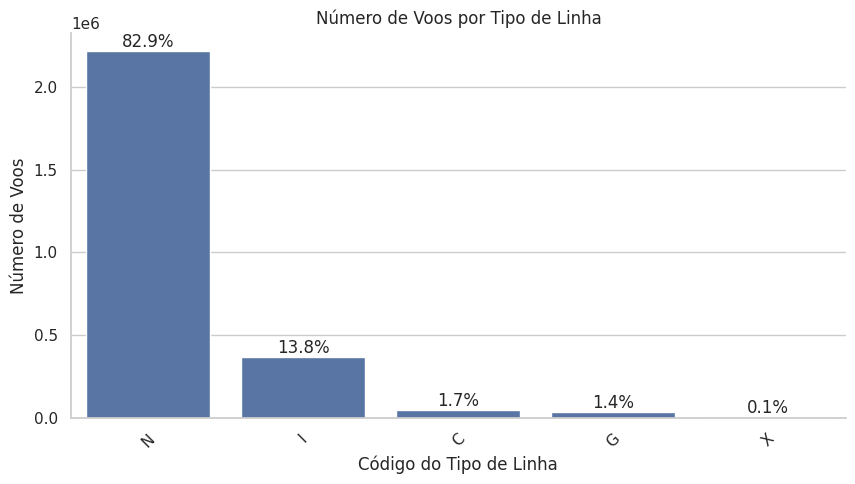

In [ ]:
# Visualizando os dados da coluna

# Contagem absoluta
contagem_tipo_linha = vra["codigo_tipo_linha"].value_counts().reset_index()
contagem_tipo_linha.columns = ["codigo_tipo_linha", "quantidade"]

# Percentual
total = contagem_tipo_linha["quantidade"].sum()
contagem_tipo_linha["percentual"] = (contagem_tipo_linha["quantidade"] / total) * 100

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=contagem_tipo_linha,
    x="codigo_tipo_linha",
    y="quantidade"
)

# Títulos e rótulos
ax.set_title("Número de Voos por Tipo de Linha")
ax.set_xlabel("Código do Tipo de Linha")
ax.set_ylabel("Número de Voos")
plt.xticks(rotation=45)

# Removendo linhas superior e direita (e opcionalmente esquerda)
sns.despine(top=True, right=True)

# Adicionando porcentagem nas barras
for index, row in contagem_tipo_linha.iterrows():
    ax.text(
        index,
        row["quantidade"],
        f'{row["percentual"]:.1f}%',
        ha='center',
        va='bottom'
    )

plt.show()



* É possível observar que cerca de 83% dos dados são de voos nacionais. Dito isso, conforme a regra de negócio, será criado um novo dataset onde contenha apenas voos nacionais.

#### Filtrando dados de voos nacionais

In [ ]:
# Criando dataframe de voos nacionais
vra_nacional = vra[vra['codigo_tipo_linha'] == 'N']

# Validando transformações antes vs depois
print(f"Shape do DataFrame original: {vra.shape}")
print(f"Shape do DataFrame filtrado por voos nacionais: {vra_nacional.shape}")
display(vra_nacional.head())

Shape do DataFrame original: (2674094, 11)
Shape do DataFrame filtrado por voos nacionais: (2217605, 11)


,icao_empresa_aerea,numero_voo,codigo_autorizacao_di,codigo_tipo_linha,icao_aerodromo_origem,icao_aerodromo_destino,partida_prevista,partida_real,chegada_prevista,chegada_real,situacao_voo
104,AZU,2914,0,N,SBGR,SBCY,2023-01-17 12:40:00,2023-01-17 13:05:00,2023-01-17 14:55:00,2023-01-17 15:03:00,REALIZADO
209,AZU,2600,0,N,SBCT,SBFI,2023-01-09 07:55:00,2023-01-09 07:51:00,2023-01-09 09:10:00,2023-01-09 09:04:00,REALIZADO
210,AZU,2600,0,N,SBCT,SBFI,2023-01-10 11:00:00,2023-01-10 11:05:00,2023-01-10 12:15:00,2023-01-10 12:26:00,REALIZADO
211,AZU,2600,0,N,SBCT,SBFI,2023-01-11 07:55:00,2023-01-11 07:55:00,2023-01-11 09:10:00,2023-01-11 09:08:00,REALIZADO
212,AZU,2600,0,N,SBCT,SBFI,2023-01-12 07:55:00,2023-01-12 08:44:00,2023-01-12 09:10:00,2023-01-12 09:49:00,REALIZADO


In [ ]:
# Validando após transformação
vra_nacional['codigo_tipo_linha'].unique()

array(['N'], dtype=object)

### Análise univariada da coluna **codigo_autorizacao_di**


O DI, um caractere numérico, serve para categorizar o motivo ou modalidade da operação de um trecho de voo (ex: é regular? é fretado? é de instrução?), sendo fundamental para a organização e estatística da aviação civil no Brasil, conforme as normas da ANAC.

    0 (Zero): Para voos regulares (comerciais de linha).
    1 (Um): Para voos fretados (charter).
    2 (Dois): Para voos de instrução.
    3 (Três): Para voos de táxi aéreo.
    4 (Quatro): Para voos de pulverização agrícola (ou outros tipos específicos de operações agrícolas).
    5 (Cinco): Para voos de reboque de planadores.
    6 (Seis): Para voos de reboque de banners (publicitários).
    7 (Sete): Para voos de fotografia ou filmagem aérea.
    8 (Oito): Para voos de táxi-aéreo (pode variar, mas é um tipo).
    9 (Nove): Para voos de transporte de carga ou correio (quando não é parte de voo regular).
    D: Etapas que sofreram alterações operacionais no sistema ou que representam voos duplicados para fins de ajuste de malha.
    E: Etapas não remuneradas que transportam objetos ou logística técnica



In [ ]:
# Quantidade em proporção de voos por codigo_autorizacao_di

vra["codigo_autorizacao_di"].value_counts(normalize=True)

,proportion
codigo_autorizacao_di,
0,9.925119e-01
9,3.640485e-03
7,2.816281e-03
2,7.482908e-04
6,1.159271e-04
1,8.301877e-05
4,7.516564e-05
E,8.601044e-06
D,3.739584e-07


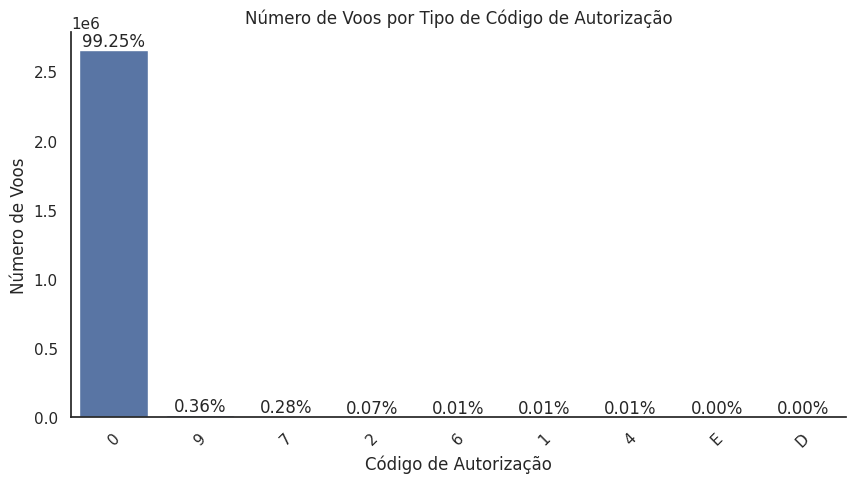

In [ ]:
# Código de visualização

# Removendo linhas de fundo (grid)
sns.set_style("white")

# Contagem absoluta
contagem_codigos = vra["codigo_autorizacao_di"].value_counts().reset_index()
contagem_codigos.columns = ["codigo_autorizacao_di", "quantidade"]

# Percentual
total = contagem_codigos["quantidade"].sum()
contagem_codigos["percentual"] = (contagem_codigos["quantidade"] / total) * 100

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=contagem_codigos,
    x="codigo_autorizacao_di",
    y="quantidade"
)

# Títulos e rótulos
ax.set_title("Número de Voos por Tipo de Código de Autorização")
ax.set_xlabel("Código de Autorização")
ax.set_ylabel("Número de Voos")
plt.xticks(rotation=45)

# Removendo linhas superior e direita
sns.despine(top=True, right=True)

# Adicionando porcentagem nas barras
for index, row in contagem_codigos.iterrows():
    ax.text(
        index,
        row["quantidade"],
        f'{row["percentual"]:.2f}%',
        ha='center',
        va='bottom'
    )

plt.show()

Com base nos dados é possível perceber que mais de 99% dos voos são do tipo 0 ou seja, voos regulares e comerciais.

Essa informação corrobora com o projeto, pois valida que essa é uma excelente base de dados, uma vez que a classificação ideal para o objetivo definido nas regras de negócio é, de fato, o tipo de voo majoritário.

#### Filtrando somente voos com código de autorização 0

In [ ]:
# Criando dataframe de voos nacionais E codigo de autorização para voos regulares(0)
vra_nacional = vra_nacional[vra_nacional['codigo_autorizacao_di'] == '0']


# Validando transformações antes vs depois
print(f"Shape do DataFrame original: {vra.shape}")
print(f"Shape do DataFrame filtrado por voos nacionais e regulares: {vra_nacional.shape}")
display(vra_nacional.head())

Shape do DataFrame original: (2674094, 11)
Shape do DataFrame filtrado por voos nacionais e regulares: (2202360, 11)


,icao_empresa_aerea,numero_voo,codigo_autorizacao_di,codigo_tipo_linha,icao_aerodromo_origem,icao_aerodromo_destino,partida_prevista,partida_real,chegada_prevista,chegada_real,situacao_voo
104,AZU,2914,0,N,SBGR,SBCY,2023-01-17 12:40:00,2023-01-17 13:05:00,2023-01-17 14:55:00,2023-01-17 15:03:00,REALIZADO
209,AZU,2600,0,N,SBCT,SBFI,2023-01-09 07:55:00,2023-01-09 07:51:00,2023-01-09 09:10:00,2023-01-09 09:04:00,REALIZADO
210,AZU,2600,0,N,SBCT,SBFI,2023-01-10 11:00:00,2023-01-10 11:05:00,2023-01-10 12:15:00,2023-01-10 12:26:00,REALIZADO
211,AZU,2600,0,N,SBCT,SBFI,2023-01-11 07:55:00,2023-01-11 07:55:00,2023-01-11 09:10:00,2023-01-11 09:08:00,REALIZADO
212,AZU,2600,0,N,SBCT,SBFI,2023-01-12 07:55:00,2023-01-12 08:44:00,2023-01-12 09:10:00,2023-01-12 09:49:00,REALIZADO


In [ ]:
# Validação após transformação
vra_nacional['codigo_autorizacao_di'].unique()

array(['0'], dtype=object)

### Análise univariada da coluna **situacao_voo**

In [ ]:
# Listando valores da coluna situacao_voo

vra_nacional['situacao_voo'].unique()

array(['REALIZADO'], dtype=object)

Perfeito, é exatamente isso que queremos. Apenas voos realizados fazem sentido para, futuramente, o modelo diferenciar voos atrasados e dos pontuais

### Análise da coluna **icao_aerodromo_origem**

In [ ]:
# Verificando a quantidade de aerodromos dos voos de origem somente nacionais

vra_nacional["icao_aerodromo_origem"].nunique()

180

#### **Top 10 aeroportos de origem com mais voos**

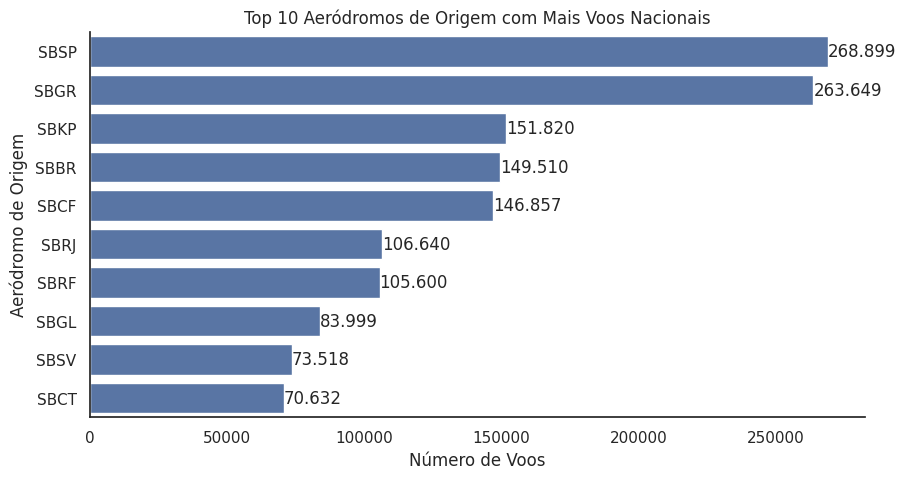

In [ ]:
# Estilo sem grid
sns.set_style("white")

# Contagem dos aeródromos de origem (Top 10)
top10_origem = (
    vra_nacional["icao_aerodromo_origem"]
    .value_counts()
    .head(10)
    .reset_index()
)

top10_origem.columns = ["icao_aerodromo_origem", "quantidade"]

# Plot horizontal
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=top10_origem,
    x="quantidade",
    y="icao_aerodromo_origem"
)

# Títulos e rótulos
ax.set_title("Top 10 Aeródromos de Origem com Mais Voos Nacionais")
ax.set_xlabel("Número de Voos")
ax.set_ylabel("Aeródromo de Origem")

# Removendo bordas superior e direita
sns.despine(top=True, right=True)

# Adicionando rótulos de quantidade nas barras
for index, row in top10_origem.iterrows():
    ax.text(
        row["quantidade"],
        index,
        f'{row["quantidade"]:,}'.replace(',', '.'),
        va='center',
        ha='left'
    )

plt.show()


#### **Pareto (percentual acumulado) – Aeródromos de origem**

In [ ]:
# Contagem de voos por aeródromo de origem
pareto_origem = (
    vra_nacional["icao_aerodromo_origem"]
    .value_counts()
    .reset_index()
)

pareto_origem.columns = ["icao_aerodromo_origem", "quantidade"]

# Percentual e percentual acumulado
total_voos = pareto_origem["quantidade"].sum()

pareto_origem["percentual"] = (pareto_origem["quantidade"] / total_voos) * 100
pareto_origem["percentual_acumulado"] = pareto_origem["percentual"].cumsum()


#### Quantos aeródromos concentram 80% dos voos de origem?

In [ ]:
# Identificando quantos aerodromos concentram 80% dos voos de origem
pareto_origem[pareto_origem["percentual_acumulado"] <= 80].shape[0]

18

In [ ]:
# Visualizando o Pareto (top aeródromos)
pareto_origem.head(19)

,icao_aerodromo_origem,quantidade,percentual,percentual_acumulado
0,SBSP,268899,12.209584,12.209584
1,SBGR,263649,11.971204,24.180788
2,SBKP,151820,6.893514,31.074302
3,SBBR,149510,6.788627,37.862929
4,SBCF,146857,6.668165,44.531094
5,SBRJ,106640,4.842078,49.373172
6,SBRF,105600,4.794856,54.168029
7,SBGL,83999,3.814045,57.982074
8,SBSV,73518,3.338146,61.320220
9,SBCT,70632,3.207105,64.527325


Aplicando a regra de pareto podemos entender de onde saem 80% dos voos:

* 19 aeródromos

* Representam ≈ 80% de todos os voos de origem

* Em um universo de 180 aeródromos

Ou seja: ~10% dos aeródromos concentram ~80% da operação nacional de saída


### Análise da coluna **icao_aerodromo_destino**

In [ ]:
# Verificando a quantidade de aerodromos dos voos de destino
vra_nacional["icao_aerodromo_destino"].nunique()

182

#### **Top 10 aeroportos de destino com mais voos**

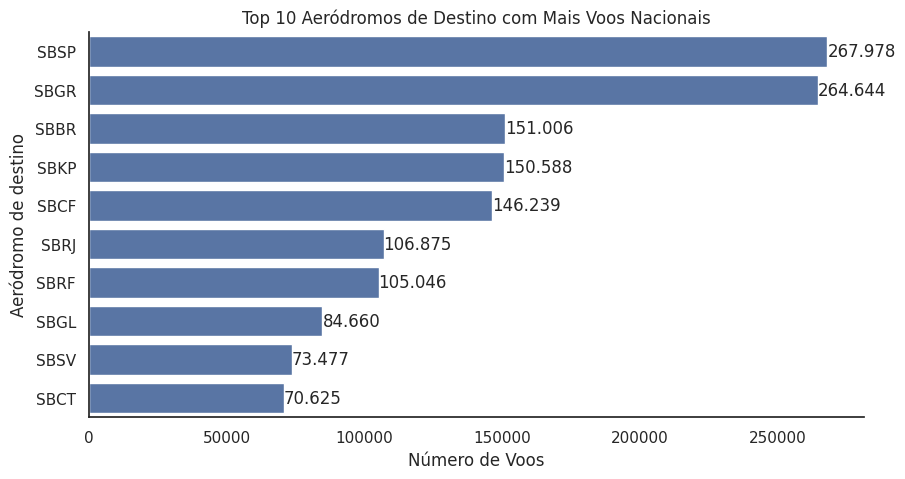

In [ ]:
# Estilo sem grid
sns.set_style("white")

# Contagem dos aeródromos de origem (Top 10)
top10_origem = (
    vra_nacional["icao_aerodromo_destino"]
    .value_counts()
    .head(10)
    .reset_index()
)

top10_origem.columns = ["icao_aerodromo_destino", "quantidade"]

# Plot horizontal
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=top10_origem,
    x="quantidade",
    y="icao_aerodromo_destino"
)

# Títulos e rótulos
ax.set_title("Top 10 Aeródromos de Destino com Mais Voos Nacionais")
ax.set_xlabel("Número de Voos")
ax.set_ylabel("Aeródromo de destino")

# Removendo bordas superior e direita
sns.despine(top=True, right=True)

# Adicionando rótulos de quantidade nas barras
for index, row in top10_origem.iterrows():
    ax.text(
        row["quantidade"],
        index,
        f'{row["quantidade"]:,}'.replace(',', '.'),
        va='center',
        ha='left'
    )

plt.show()


#### **Pareto de DESTINO Contagem + percentual acumulado**

In [ ]:
# Contagem de voos por aeródromo de destino
pareto_destino = (
    vra_nacional["icao_aerodromo_destino"]
    .value_counts()
    .reset_index()
)

pareto_destino.columns = ["icao_aerodromo_destino", "quantidade"]

# Percentual e percentual acumulado
total_voos = pareto_destino["quantidade"].sum()

pareto_destino["percentual"] = (pareto_destino["quantidade"] / total_voos) * 100
pareto_destino["percentual_acumulado"] = pareto_destino["percentual"].cumsum()


In [ ]:
# Ver rapidamente o Pareto (top aeródromos DESTINO)
pareto_destino.head(19)

,icao_aerodromo_destino,quantidade,percentual,percentual_acumulado
0,SBSP,267978,12.167765,12.167765
1,SBGR,264644,12.016382,24.184148
2,SBBR,151006,6.856554,31.040702
3,SBKP,150588,6.837574,37.878276
4,SBCF,146239,6.640104,44.518380
5,SBRJ,106875,4.852749,49.371129
6,SBRF,105046,4.769702,54.140831
7,SBGL,84660,3.844058,57.984889
8,SBSV,73477,3.336285,61.321174
9,SBCT,70625,3.206787,64.527961


É possível notar:

* Os mesmos ~19 aeródromos

* Concentrando ≈ 80% dos voos

* Com percentuais quase idênticos aos de ORIGEM

Ou seja,  

* A malha aérea nacional é altamente concentrada e praticamente simétrica entre origem e destino.

Isso reforça a centralização operacional, assim como pode indicar um possível risco sistêmico de atrasos que se propagam caso os voos com mais atrasos vierem desses aeródromos.

### Análise da coluna **icao_empresa_aerea**

In [ ]:
# Verificando a quantidade de empresas aéreas na base

vra_nacional['icao_empresa_aerea'].nunique()

9

In [ ]:
vra_nacional["icao_empresa_aerea"].value_counts().head(10)


,count
icao_empresa_aerea,
AZU,814556
TAM,708466
GLO,594032
ACN,46601
PTB,32241
PAM,3488
ABJ,2535
CQB,422
SID,19


In [ ]:
# Criando dataframe a partir da contagem
df_pareto_cia = (
    vra_nacional["icao_empresa_aerea"]
    .value_counts()
    .reset_index()
)

df_pareto_cia.columns = ["icao_empresa_aerea", "quantidade"]

# Percentuais
total = df_pareto_cia["quantidade"].sum()

df_pareto_cia["percentual"] = df_pareto_cia["quantidade"] / total * 100
df_pareto_cia["percentual_acumulado"] = df_pareto_cia["percentual"].cumsum()

df_pareto_cia


,icao_empresa_aerea,quantidade,percentual,percentual_acumulado
0,AZU,814556,36.985597,36.985597
1,TAM,708466,32.168492,69.154089
2,GLO,594032,26.972520,96.126610
3,ACN,46601,2.115957,98.242567
4,PTB,32241,1.463930,99.706497
5,PAM,3488,0.158376,99.864872
6,ABJ,2535,0.115104,99.979976
7,CQB,422,0.019161,99.999137
8,SID,19,0.000863,100.000000


É possível perceber que as companhias AZU, TAM e GLO detem aproximadamente 96% da operação aérea nacional

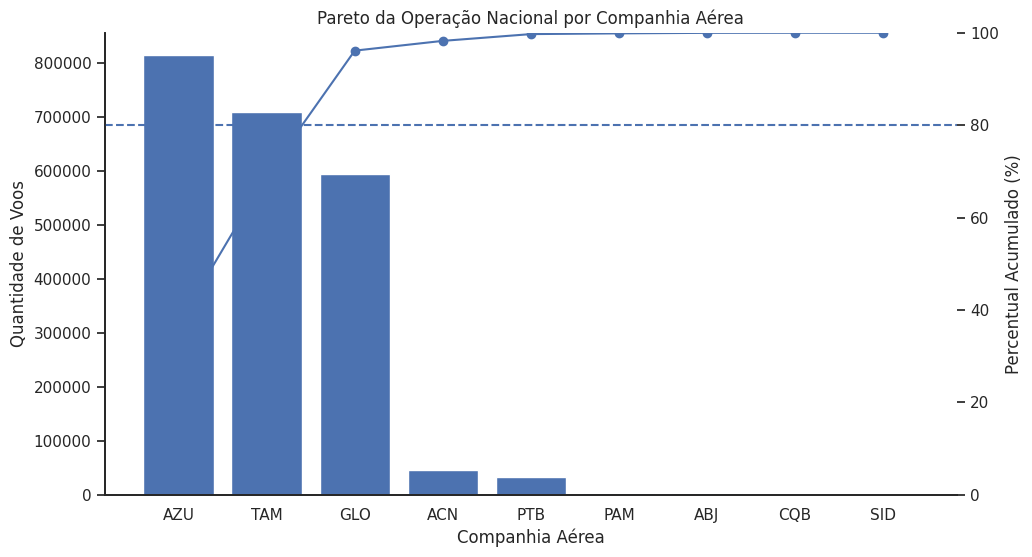

In [ ]:
fig, ax1 = plt.subplots(figsize=(11, 6))

# Barras — quantidade
ax1.bar(
    df_pareto_cia["icao_empresa_aerea"],
    df_pareto_cia["quantidade"]
)
ax1.set_xlabel("Companhia Aérea")
ax1.set_ylabel("Quantidade de Voos")

# Eixo secundário — percentual acumulado
ax2 = ax1.twinx()
ax2.plot(
    df_pareto_cia["icao_empresa_aerea"],
    df_pareto_cia["percentual_acumulado"],
    marker="o"
)
ax2.set_ylabel("Percentual Acumulado (%)")
ax2.set_ylim(0, 100)

# Linha de referência dos 80%
ax2.axhline(80, linestyle="--")

# Removendo bordas superior e direita
sns.despine(top=True, right=True)

plt.title("Pareto da Operação Nacional por Companhia Aérea")
plt.show()


A operação aérea nacional apresenta altíssima concentração, onde **apenas 3 companhias (AZU, TAM e GLO) são responsáveis por mais de 96% dos voos comerciais**. Isso indica que a dinâmica operacional do sistema é fortemente dominada por essas empresas, **tornando a variável companhia aérea altamente relevante para a modelagem de atraso de voos**.

### Criação da variável alvo e outras (Features Engineering)

#### **Calcular Tempo de Voo Estimado**

Calculando a diferença entre `chegada_prevista` e `partida_prevista` para obter o tempo de voo estimado em horas.

In [ ]:
vra_nacional['tempo_voo_estimado'] = (vra_nacional['chegada_prevista'] - vra_nacional['partida_prevista']).dt.total_seconds() / 3600
display(vra_nacional[['partida_prevista', 'chegada_prevista', 'tempo_voo_estimado']].head())

,partida_prevista,chegada_prevista,tempo_voo_estimado
104,2023-01-17 12:40:00,2023-01-17 14:55:00,2.25
209,2023-01-09 07:55:00,2023-01-09 09:10:00,1.25
210,2023-01-10 11:00:00,2023-01-10 12:15:00,1.25
211,2023-01-11 07:55:00,2023-01-11 09:10:00,1.25
212,2023-01-12 07:55:00,2023-01-12 09:10:00,1.25


#### **Calcular Tempo de Voo Real**
Calculando a diferença entre `chegada_real` e `partida_real` para obter o tempo de voo real em horas.

In [ ]:
vra_nacional['tempo_voo_real'] = (vra_nacional['chegada_real'] - vra_nacional['partida_real']).dt.total_seconds() / 3600
display(vra_nacional[['partida_real', 'chegada_real', 'tempo_voo_real']].head())

,partida_real,chegada_real,tempo_voo_real
104,2023-01-17 13:05:00,2023-01-17 15:03:00,1.966667
209,2023-01-09 07:51:00,2023-01-09 09:04:00,1.216667
210,2023-01-10 11:05:00,2023-01-10 12:26:00,1.350000
211,2023-01-11 07:55:00,2023-01-11 09:08:00,1.216667
212,2023-01-12 08:44:00,2023-01-12 09:49:00,1.083333


#### **Calcular Diferença de Previsão vs. Real**

Calculando a diferença entre o tempo de voo real e o estimado em horas.

In [ ]:
vra_nacional['diferenca_previsao_real'] = vra_nacional['tempo_voo_real'] - vra_nacional['tempo_voo_estimado']
display(vra_nacional[['tempo_voo_estimado', 'tempo_voo_real', 'diferenca_previsao_real']].head())

,tempo_voo_estimado,tempo_voo_real,diferenca_previsao_real
104,2.25,1.966667,-0.283333
209,1.25,1.216667,-0.033333
210,1.25,1.350000,0.100000
211,1.25,1.216667,-0.033333
212,1.25,1.083333,-0.166667


#### **Identificando Voos com Atraso (Criação do Target Principal de Atraso Na Partida)**


Segundo a ANAC (Brasil) e normas internacionais (como as da IATA),
atraso é a partida ou chegada de um voo **após o horário previsto**, medido pela diferença de tempo em relação à previsão original.

A **regra de atraso superior a 15 minutos, não é oficial, porém é amplamente utilizada na aviação civil como critério operacional de pontualidade**. Ela é adotada por órgãos reguladores e pela indústria (como ANAC, FAA e IATA) para diferenciar variações normais da operação de atrasos relevantes, causados por fatores como logística, tráfego aéreo, meteorologia ou gestão de solo.

Por isso, optamos por considerar um voo como atrasado quando a diferença entre o horário previsto e o real (de partida ou chegada) excede 15 minutos, pois torna o atraso operacionalmente significativo e passível de análise.

Esses 15 minutos vêm de margens de tolerância históricas em regulamentações ao redor mundo para pequenas variações. As regras brasileiras da ANAC sobre atraso de voo são mais detalhadas quanto à assistência para proteger o passageiro em atrasos mais longos (1h, 2h, 4h).

Fonte ANAC: https://www2.anac.gov.br/publicacoes/arquivos/Dicas_ANAC_Atrasos_e_Cancelamentos_web.pdf

Portanto, como regra de negócio temos:

atraso > 15 min → 1 (Atrasado)

atraso ≤ 15 min → 0 (Pontual)


In [ ]:
# Target (variável resposta)
vra_nacional["atraso_partida_min"] = (
    vra_nacional["partida_real"] - vra_nacional["partida_prevista"]
).dt.total_seconds() / 60

vra_nacional["voo_com_atraso"] = (
    vra_nacional["atraso_partida_min"] > 15
).astype(int)

# Visualizando resultado
display(vra_nacional[['atraso_partida_min', 'voo_com_atraso']].head())  # Valores negativos indicam voos adiantados



,atraso_partida_min,voo_com_atraso
104,25.0,1
209,-4.0,0
210,5.0,0
211,0.0,0
212,49.0,1


#### **Análise de desbalanceamento**

In [ ]:
# contagem de voos com atraso
vra_nacional["voo_com_atraso"].value_counts()


,count
voo_com_atraso,
0,1866117
1,336243


* A base possui ao todo eventos de atraso 336.243 contra 1.866.117 voos sem atraso. Isso demonstra o quanto esse tipo de evento é desbalanceado.

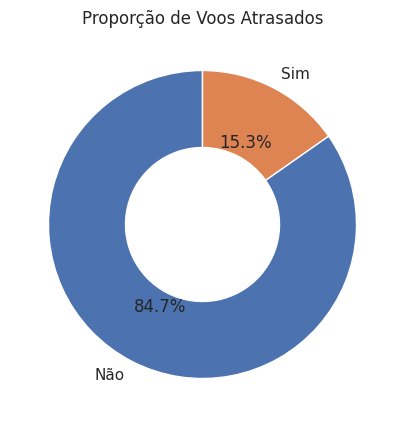

In [ ]:
# Criando gráfico de rosca para melhor visualização da proporção de voos com atraso
sns.set_style("whitegrid")

plt.figure(figsize=(5,5))
delay_counts = vra_nacional['voo_com_atraso'].value_counts()
plt.pie(delay_counts, labels=['Não', 'Sim'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.5))
plt.title("Proporção de Voos Atrasados")
plt.show()

A variável alvo apresenta **desbalanceamento** moderado, com aproximadamente 85% dos voos classificados como pontuais e 15% como atrasados.

#### **Estatísticas descritivas do atraso**

In [ ]:
# Estatísticas para entender o comportamento do atraso

vra_nacional["atraso_partida_min"].describe()

,atraso_partida_min
count,2.200116e+06
mean,4.539210e+00
std,3.569421e+02
min,-5.249060e+05
25%,-7.000000e+00
50%,-2.000000e+00
75%,7.000000e+00
max,4.463500e+04


Em resumo temos:

* min = -524.906 minutos → ~ -364 dias (voo com 1 anos de adiantamento)

* max = 4.464 minutos → ~ 74 horas de atraso

* std = 357 minutos → desvio enorme para uma média de ~4.5 minutos

Existem valores extremos de atraso o que eleva muito o desvio-padrão e pode provocar ruído na modelagem visto que modelos de ML não lidam bem com outliers sem um tratamento específico. Antes de pensar em excluir estes dados apenas tratando-os como inconsistentes, é preciso tentar entendê-los.

In [ ]:
# Investigando atrasos maiores que 4 horas
limite_max = 360  # 6 horas
limite_min = 240

#  Partidas atrasadas a mais de 4 horas seguindo a RESOLUÇÃO 400 da ANAC
outlier_sup = vra_nacional.loc[
    vra_nacional["atraso_partida_min"] >= limite_min,
    ["atraso_partida_min"]
].copy()


In [ ]:
outlier_sup['atraso_partida_min']

,atraso_partida_min
782,249.0
1919,264.0
1933,280.0
1946,244.0
1960,264.0
...,...
2872747,242.0
2874517,288.0
2876052,350.0
2886210,376.0


Há 4285 voos com atrasos maiores que 4 horas isso é aproximadamente ≈1,27% do total de atrasos (336.243).

Ou seja, mais de 98% dos atrasos são menores que 4 horas.  

Isso reforça que o fenômeno dominante é atraso operacional comum e que os atrasos extremos são eventos raros.

Misturar esses dois eventos pode não representar a realidade do que estamos buscando para o negócio.

In [ ]:
# Verificando valores nulos antes de prosseguir
vra_nacional.isnull().sum()

,0
icao_empresa_aerea,0
numero_voo,0
codigo_autorizacao_di,0
codigo_tipo_linha,0
icao_aerodromo_origem,0
icao_aerodromo_destino,0
partida_prevista,2244
partida_real,0
chegada_prevista,2244
chegada_real,0


In [ ]:
# Removendo todas as linhas com qualquer nulo

vra_nacional = vra_nacional.dropna()

In [ ]:
# verificando novamente os nulos após exclusão
vra_nacional.isnull().sum()

,0
icao_empresa_aerea,0
numero_voo,0
codigo_autorizacao_di,0
codigo_tipo_linha,0
icao_aerodromo_origem,0
icao_aerodromo_destino,0
partida_prevista,0
partida_real,0
chegada_prevista,0
chegada_real,0


In [ ]:
# Investigando ADIANTAMENTOS EXTREMOS (adiantamento > 60 min)

LIMITE_ADIANTAMENTO_EXTREMO = -60

total_voos = len(vra_nacional)

adiantamento_extremo = vra_nacional[
    vra_nacional["atraso_partida_min"] < LIMITE_ADIANTAMENTO_EXTREMO
]

qtd_adiantamento_extremo = len(adiantamento_extremo)
pct_adiantamento_extremo = (qtd_adiantamento_extremo / total_voos) * 100

qtd_adiantamento_extremo, pct_adiantamento_extremo


(763, 0.034679989600548335)

763 voos com adiantamento extremo (< -60 min) com relação a coluna `atraso_partida_min`

Esse número é menos de 0,04% dos registros. Esse volume não representa comportamento normal da operação aérea.

In [ ]:
# Verificando a distribuição dos adiantamentos extremos
adiantamento_extremo["atraso_partida_min"].describe()


,atraso_partida_min
count,763.000000
mean,-1508.138925
std,18982.912756
min,-524906.000000
25%,-1414.000000
50%,-1251.000000
75%,-122.500000
max,-61.000000


Fazendo um resumo da distribuição dos adiantamentos temos:

* Quantidade:	763	volume irrelevante (<0,04%)

* Média:	-1.508 min	~ -25 horas

* Mediana:	-1.251 min	~ -21 horas

* Q1:	-1.414 min	~ -23,5 horas

* Q3:	-122 min	~ -2 horas

* Mínimo:	-524.906 minutos	~ -364 dias (!)

* Máximo:	-61 minutos	(limiar definido)

In [ ]:
# Removendo adiantamentos extremos (inferiores a -60 minutos),
# considerados inconsistências de registro temporal

limite_adiantamento = -60

vra_nacional = vra_nacional[
    vra_nacional["atraso_partida_min"] > limite_adiantamento
].copy()

Adiantamentos superiores a 60 minutos não representam antecipação real da operação aérea.

Aparentemente são inconsistências de registro temporal, seja uma reprogramação de malha ou um erro de preenchimento.

Esses casos distorcem significativamente a distribuição do atraso e foram removidos da base de modelagem.

In [ ]:
# Verificando distribuição novamente após exclusão dos adiantados extremos

vra_nacional["atraso_partida_min"].describe()


,atraso_partida_min
count,2.199305e+06
mean,5.065409e+00
std,4.252622e+01
min,-5.900000e+01
25%,-7.000000e+00
50%,-2.000000e+00
75%,7.000000e+00
max,4.463500e+04


Agora, podemos ler e interpretar - estatisticamente - os dados da seguinte forma:

| Métrica                   | Interpretação                                     |
| ------------------------- | ------------------------------------------------- |
| **Mediana = -2 min**      | Operação levemente adiantada na maioria dos casos |
| **Q3 = 7 min**            | 75% dos voos saem até 7 min após o previsto       |
| **Média = 5 min**       | Pequeno atraso médio sistêmico                    |
| **Máx = 4464 min (~74h)** | Casos extremos reais (reprogramação, greves, falhas, condições climáticas extremas, etc)    |


#### **E quanto ao tratamento dos atrasos > 240 minutos?**

Como dito anteriormente, temos cerca de  4285 voos com atrasos maiores que 4 horas alguns chegando a mais de 72 horas. A fim de seguir o modelo da ANAC que indica que a classificação operacional dos atrasos é realizada por faixas de tempo, será recriada uma variável categórica de severidade do atraso, alinhada às faixas oficiais, permitindo tratar atrasos extremos como eventos válidos sem distorcer a distribuição da variável contínua.

In [ ]:
# Visualizando os voos com os maiores atrasos em minutos
vra_nacional.sort_values("atraso_partida_min", ascending=False).head(10)


,icao_empresa_aerea,numero_voo,codigo_autorizacao_di,codigo_tipo_linha,icao_aerodromo_origem,icao_aerodromo_destino,partida_prevista,partida_real,chegada_prevista,chegada_real,situacao_voo,tempo_voo_estimado,tempo_voo_real,diferenca_previsao_real,atraso_partida_min,voo_com_atraso
1979267,ABJ,1407,0,N,SNCL,SBSV,2025-01-03 13:45:00,2025-02-03 13:40:00,2025-01-03 14:15:00,2025-02-03 14:00:00,REALIZADO,0.500000,0.333333,-0.166667,44635.0,1
2054847,GLO,9173,0,N,SBFI,SBGL,2025-01-04 00:05:00,2025-01-05 23:58:00,2025-01-04 02:05:00,2025-01-06 01:39:00,REALIZADO,2.000000,1.683333,-0.316667,2873.0,1
2054853,GLO,9173,0,N,SBFI,SBGL,2025-01-11 00:05:00,2025-01-12 23:57:00,2025-01-11 02:05:00,2025-01-13 01:41:00,REALIZADO,2.000000,1.733333,-0.266667,2872.0,1
2054865,GLO,9173,0,N,SBFI,SBGL,2025-01-25 00:05:00,2025-01-26 23:53:00,2025-01-25 02:05:00,2025-01-27 01:51:00,REALIZADO,2.000000,1.966667,-0.033333,2868.0,1
2054859,GLO,9173,0,N,SBFI,SBGL,2025-01-18 00:05:00,2025-01-19 23:50:00,2025-01-18 02:05:00,2025-01-20 01:44:00,REALIZADO,2.000000,1.900000,-0.100000,2865.0,1
2518158,AZU,2606,0,N,SBCF,SBPS,2025-05-18 18:05:00,2025-05-19 22:13:00,2025-05-18 19:30:00,2025-05-19 23:22:00,REALIZADO,1.416667,1.150000,-0.266667,1688.0,1
403496,AZU,4275,0,N,SBCY,SBCG,2023-02-03 00:55:00,2023-02-04 02:53:00,2023-02-03 02:05:00,2023-02-04 04:00:00,REALIZADO,1.166667,1.116667,-0.050000,1558.0,1
115746,AZU,2654,0,N,SBPV,SBEG,2023-10-27 00:10:00,2023-10-28 01:35:00,2023-10-27 01:35:00,2023-10-28 02:57:00,REALIZADO,1.416667,1.366667,-0.050000,1525.0,1
2054864,GLO,9173,0,N,SBFI,SBGL,2025-01-24 00:05:00,2025-01-25 01:03:00,2025-01-24 02:05:00,2025-01-25 02:48:00,REALIZADO,2.000000,1.750000,-0.250000,1498.0,1
1825104,AZU,4053,0,N,SBSO,SBCY,2024-08-23 00:15:00,2024-08-24 01:09:00,2024-08-23 01:05:00,2024-08-24 01:56:00,REALIZADO,0.833333,0.783333,-0.050000,1494.0,1


#### **Criar uma variável categórica de severidade**

In [ ]:
def classificar_atraso(minutos):
    if minutos < 0:
        return "Antecipado"
    elif minutos <= 15:
        return "Pontual"
    elif minutos <= 60:
        return "Atraso 15-60"
    elif minutos <= 120:
        return "Atraso 60-120"
    elif minutos <= 240:
        return "Atraso 120-240"
    else:
        return "Atraso > 240"

vra_nacional["faixa_atraso_partida"] = (
    vra_nacional["atraso_partida_min"]
    .apply(classificar_atraso)
)


In [ ]:
# Verificando nova atraves dos atrasos extremos

vra_nacional.sort_values("atraso_partida_min", ascending=False).head(10)

,icao_empresa_aerea,numero_voo,codigo_autorizacao_di,codigo_tipo_linha,icao_aerodromo_origem,icao_aerodromo_destino,partida_prevista,partida_real,chegada_prevista,chegada_real,situacao_voo,tempo_voo_estimado,tempo_voo_real,diferenca_previsao_real,atraso_partida_min,voo_com_atraso,faixa_atraso_partida
1979267,ABJ,1407,0,N,SNCL,SBSV,2025-01-03 13:45:00,2025-02-03 13:40:00,2025-01-03 14:15:00,2025-02-03 14:00:00,REALIZADO,0.500000,0.333333,-0.166667,44635.0,1,Atraso > 240
2054847,GLO,9173,0,N,SBFI,SBGL,2025-01-04 00:05:00,2025-01-05 23:58:00,2025-01-04 02:05:00,2025-01-06 01:39:00,REALIZADO,2.000000,1.683333,-0.316667,2873.0,1,Atraso > 240
2054853,GLO,9173,0,N,SBFI,SBGL,2025-01-11 00:05:00,2025-01-12 23:57:00,2025-01-11 02:05:00,2025-01-13 01:41:00,REALIZADO,2.000000,1.733333,-0.266667,2872.0,1,Atraso > 240
2054865,GLO,9173,0,N,SBFI,SBGL,2025-01-25 00:05:00,2025-01-26 23:53:00,2025-01-25 02:05:00,2025-01-27 01:51:00,REALIZADO,2.000000,1.966667,-0.033333,2868.0,1,Atraso > 240
2054859,GLO,9173,0,N,SBFI,SBGL,2025-01-18 00:05:00,2025-01-19 23:50:00,2025-01-18 02:05:00,2025-01-20 01:44:00,REALIZADO,2.000000,1.900000,-0.100000,2865.0,1,Atraso > 240
2518158,AZU,2606,0,N,SBCF,SBPS,2025-05-18 18:05:00,2025-05-19 22:13:00,2025-05-18 19:30:00,2025-05-19 23:22:00,REALIZADO,1.416667,1.150000,-0.266667,1688.0,1,Atraso > 240
403496,AZU,4275,0,N,SBCY,SBCG,2023-02-03 00:55:00,2023-02-04 02:53:00,2023-02-03 02:05:00,2023-02-04 04:00:00,REALIZADO,1.166667,1.116667,-0.050000,1558.0,1,Atraso > 240
115746,AZU,2654,0,N,SBPV,SBEG,2023-10-27 00:10:00,2023-10-28 01:35:00,2023-10-27 01:35:00,2023-10-28 02:57:00,REALIZADO,1.416667,1.366667,-0.050000,1525.0,1,Atraso > 240
2054864,GLO,9173,0,N,SBFI,SBGL,2025-01-24 00:05:00,2025-01-25 01:03:00,2025-01-24 02:05:00,2025-01-25 02:48:00,REALIZADO,2.000000,1.750000,-0.250000,1498.0,1,Atraso > 240
1825104,AZU,4053,0,N,SBSO,SBCY,2024-08-23 00:15:00,2024-08-24 01:09:00,2024-08-23 01:05:00,2024-08-24 01:56:00,REALIZADO,0.833333,0.783333,-0.050000,1494.0,1,Atraso > 240


* Agrupando os atrasos na coluna `faixa_atraso_partida` pode ajudar o modelo a entender os padrões necessários principalmente quando falamos dos atrasos/realocação de voos( atrasos de  > 240)

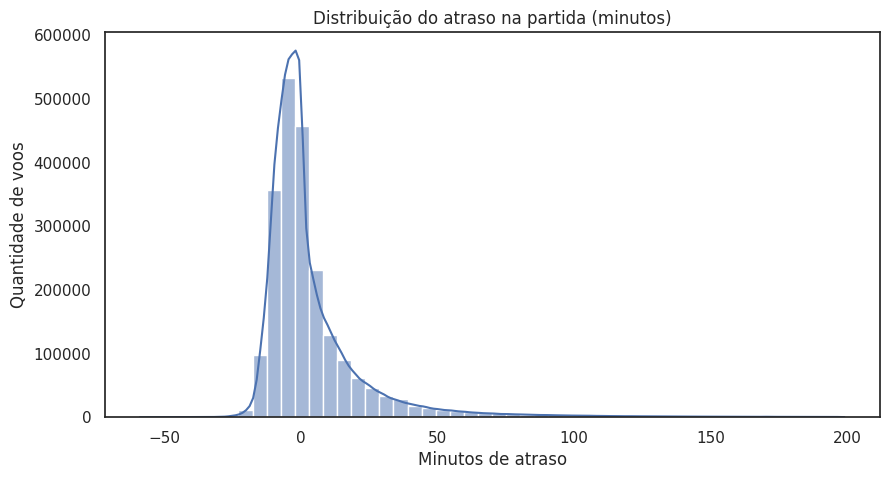

In [ ]:
# Análise da distribuição do atraso em minutos

vra_modelo = vra_nacional[
    vra_nacional["atraso_partida_min"].between(-60, 300)
]

sns.set_style("white")

plt.figure(figsize=(10,5))
sns.histplot(vra_nacional[vra_nacional['atraso_partida_min'] < 200]['atraso_partida_min'], bins=50, kde=True)
plt.title("Distribuição do atraso na partida (minutos)")
plt.xlabel("Minutos de atraso")
plt.ylabel("Quantidade de voos")
plt.show()

* A maior parte dos voos opera próxima do horário previsto, com antecipações leves e poucos atrasos extremos conforme evidencia a assimetria da calda a direita.

#### **Percentual por faixa**


In [ ]:
faixa_pct = (
    vra_nacional["faixa_atraso_partida"]
    .value_counts(normalize=True)
    .mul(100)
    .round(3)
)

faixa_pct


,proportion
faixa_atraso_partida,
Antecipado,55.601
Pontual,29.110
Atraso 15-60,12.390
Atraso 60-120,1.993
Atraso 120-240,0.715
Atraso > 240,0.192


Apenas 1,9% dos voos apresentam atraso superior a 240 minutos, caracterizando eventos excepcionais da operação.

#### **Distribuição das faixas por companhia (Top 3)**

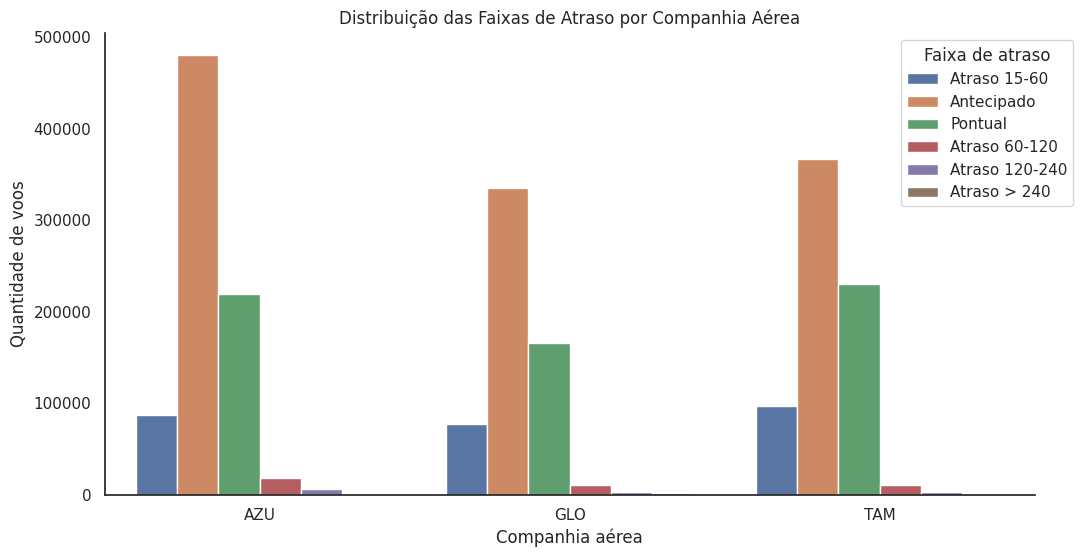

In [ ]:
top_cias = ["AZU", "GLO", "TAM"]

df_cia = vra_nacional[vra_nacional["icao_empresa_aerea"].isin(top_cias)]

plt.figure(figsize=(12, 6))

sns.countplot(
    data=df_cia,
    x="icao_empresa_aerea",
    hue="faixa_atraso_partida",
    order=top_cias
)

plt.title("Distribuição das Faixas de Atraso por Companhia Aérea")
plt.xlabel("Companhia aérea")
plt.ylabel("Quantidade de voos")

plt.legend(title="Faixa de atraso", bbox_to_anchor=(1.05, 1))
sns.despine()
plt.show()


In [ ]:
# Filtrando empresas com base mínima de voos
total_voos_cia = vra_nacional.groupby("icao_empresa_aerea").size()

cia_com_base = total_voos_cia[total_voos_cia >= 1000].index


#### **Quantidade de Atrasos Graves Por Cia( > 240 min)**

In [ ]:
# Mostrando percentual + volume absoluto de voos com atrasos graves

resumo_atraso_grave = pd.DataFrame({
    "total_voos": total_voos_cia,
    "voos_atraso_grave": vra_nacional[vra_nacional["faixa_atraso_partida"] == "Atraso > 240"]
        .groupby("icao_empresa_aerea").size()
})

resumo_atraso_grave["pct_atraso_grave"] = (
    resumo_atraso_grave["voos_atraso_grave"]
    / resumo_atraso_grave["total_voos"] * 100
)

resumo_atraso_grave.sort_values("pct_atraso_grave", ascending=False).round(2)


,total_voos,voos_atraso_grave,pct_atraso_grave
icao_empresa_aerea,,,
ABJ,1755,161.0,9.17
PTB,31924,522.0,1.64
CQB,257,4.0,1.56
PAM,3356,43.0,1.28
ACN,46535,291.0,0.63
GLO,593837,1419.0,0.24
AZU,813181,1330.0,0.16
TAM,708457,442.0,0.06
SID,3,NaN,NaN


* Apesar do percentual baixo, as empresas GLO e AZU concentram um volume absoluto relevante de atrasos graves.

#### **Atraso por empresa aérea (mediana)**

In [ ]:
# Filtrando voos com atraso
vra_atrasos = vra_modelo[
    vra_modelo["atraso_partida_min"] > 0
]

In [ ]:
# Mediana de atraso em minutos por Cia
vra_atrasos.groupby("icao_empresa_aerea")["atraso_partida_min"].median().sort_values()

,atraso_partida_min
icao_empresa_aerea,
AZU,11.0
TAM,11.0
GLO,12.0
CQB,18.5
PAM,19.0
ACN,24.0
PTB,25.0
SID,65.0
ABJ,165.0


* A mediana do atraso entre voos atrasados revela diferenças relevantes entre as companhias aéreas. **Grandes operadoras apresentam atrasos típicos inferiores a 15 minutos**, indicando maior previsibilidade operacional.

* Em contraste, **companhias com menor volume de operações exibem medianas significativamente mais altas, sugerindo que, quando ocorrem atrasos, estes tendem a ser mais severos**. Esse comportamento reforça a necessidade de tratar a variável empresa aérea de forma cuidadosa na modelagem.

### Atraso médio das empresas com mais voos

In [ ]:
# Identificando as TOP 5 companhias com mais voos

top5_cias = (
    vra_nacional["icao_empresa_aerea"]
    .value_counts()
    .head(5)
    .index
)

# Calculando o atraso médio de partida apenas dessas companhias

atraso_medio_cia = (
    vra_nacional[vra_nacional["icao_empresa_aerea"].isin(top5_cias)]
    .groupby("icao_empresa_aerea")["atraso_partida_min"]
    .mean()
    .sort_values()
)

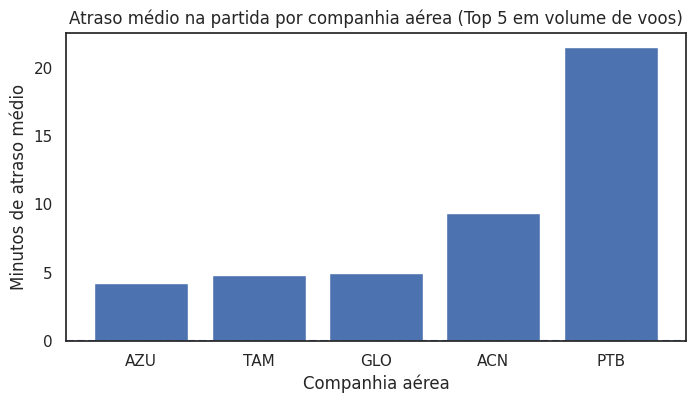

In [ ]:
# Gráfico de barras (atraso médio por companhia)

sns.set_style("white")

plt.figure(figsize=(8,4))
plt.bar(
    atraso_medio_cia.index,
    atraso_medio_cia.values
)
plt.axhline(0, linestyle="--")  # linha de referência (pontualidade)
plt.title("Atraso médio na partida por companhia aérea (Top 5 em volume de voos)")
plt.ylabel("Minutos de atraso médio")
plt.xlabel("Companhia aérea")
plt.show()

### Decomposição das colunas de data a partir de partida_prevista

In [ ]:
# =========================
# Features temporais (EDA)
# =========================
vra_nacional["hora_prevista"] = vra_nacional["partida_prevista"].dt.hour

# Hora formatada (apenas para visualização)
vra_nacional["hora_prevista_str"] = (
    vra_nacional["partida_prevista"].dt.strftime("%H:%M:%S")
)

# Ano apenas usar na análise
vra_nacional["ano"] = vra_nacional["partida_prevista"].dt.year



In [ ]:
# =========================
# Features temporais (ML)
# =========================

# Hora contínua (melhor representação para modelos)
vra_nacional["hora_prevista_frac"] = (
    vra_nacional["partida_prevista"].dt.hour +
    vra_nacional["partida_prevista"].dt.minute / 60
)

vra_nacional["dia_semana"] = vra_nacional["partida_prevista"].dt.dayofweek
vra_nacional["mes"] = vra_nacional["partida_prevista"].dt.month

vra_nacional["eh_fim_de_semana"] = (
    vra_nacional["dia_semana"].isin([5, 6]).astype(int)
)


In [ ]:
# Visualizando dataset apos criação de novas colunas
vra_nacional.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2199305 entries, 104 to 2887024
Data columns (total 24 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   icao_empresa_aerea       object        
 1   numero_voo               object        
 2   codigo_autorizacao_di    object        
 3   codigo_tipo_linha        object        
 4   icao_aerodromo_origem    object        
 5   icao_aerodromo_destino   object        
 6   partida_prevista         datetime64[ns]
 7   partida_real             datetime64[ns]
 8   chegada_prevista         datetime64[ns]
 9   chegada_real             datetime64[ns]
 10  situacao_voo             object        
 11  tempo_voo_estimado       float64       
 12  tempo_voo_real           float64       
 13  diferenca_previsao_real  float64       
 14  atraso_partida_min       float64       
 15  voo_com_atraso           int64         
 16  faixa_atraso_partida     object        
 17  hora_prevista            int32

In [ ]:
# Resetando o index
vra_nacional.reset_index(drop=True, inplace=True)

#### Criação da coluna **faixa_horaria**

Identificamos que essa pode ser uma feature boa para o modelo pois traduz comportamento operacional, não só tempo. Por exemplo:

* Voos da manhã tendem a ser mais pontuais

* Noite/madrugada podem sofrer com restrições operacionais e menor capacidade de recuperação

In [ ]:
# Criação da coluna faixa_horaria
vra_nacional["faixa_horaria"] = pd.cut(
    vra_nacional["hora_prevista"],
    bins=[-1, 5, 11, 17, 23],
    labels=["madrugada", "manha", "tarde", "noite"]
)

#### **Criação das colunas `eh_feriado` e `eh_vespera_feriado`**

In [ ]:
# Importando biblioteca holidays
import holidays

# Feriados nacionais do Brasil
br_holidays = holidays.Brazil(years=vra_nacional["ano"].unique())

# Criando a feature
vra_nacional["eh_feriado"] = (
    vra_nacional["partida_prevista"].dt.normalize().isin(br_holidays)
).astype(int)


/tmp/ipython-input-4112182147.py:9: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  vra_nacional["partida_prevista"].dt.normalize().isin(br_holidays)


In [ ]:
# Indicador de véspera de feriado nacional
# Usado como proxy de aumento potencial de demanda
vra_nacional["eh_vespera_feriado"] = (
    vra_nacional["partida_prevista"].dt.normalize() + pd.Timedelta(days=1)
).isin(br_holidays).astype(int)


/tmp/ipython-input-1548632891.py:5: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  ).isin(br_holidays).astype(int)


As variáveis **eh_feriado** e **eh_vespera_feriado** foram criadas para capturar impactos operacionais associados a datas de maior demanda no transporte aéreo, como aumento de fluxo de passageiros e maior complexidade logística, fatores que historicamente influenciam o comportamento dos atrasos.

In [ ]:
vra_nacional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199305 entries, 0 to 2199304
Data columns (total 27 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   icao_empresa_aerea       object        
 1   numero_voo               object        
 2   codigo_autorizacao_di    object        
 3   codigo_tipo_linha        object        
 4   icao_aerodromo_origem    object        
 5   icao_aerodromo_destino   object        
 6   partida_prevista         datetime64[ns]
 7   partida_real             datetime64[ns]
 8   chegada_prevista         datetime64[ns]
 9   chegada_real             datetime64[ns]
 10  situacao_voo             object        
 11  tempo_voo_estimado       float64       
 12  tempo_voo_real           float64       
 13  diferenca_previsao_real  float64       
 14  atraso_partida_min       float64       
 15  voo_com_atraso           int64         
 16  faixa_atraso_partida     object        
 17  hora_prevista            in

### Análise bivariada da varável alvo

#### **O horário do voo influencia o atraso? (Atraso médio por faixa horária)**

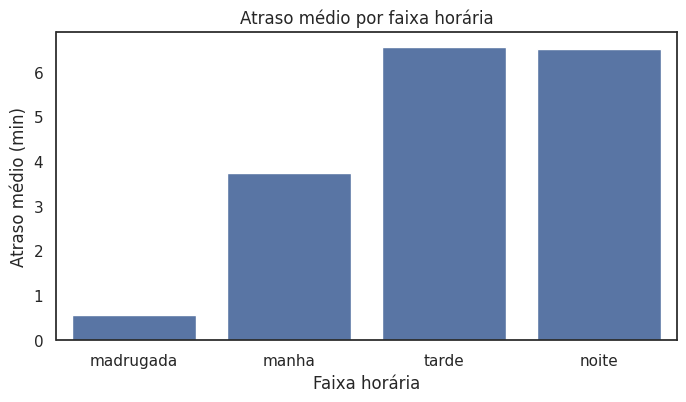

In [ ]:
ordem = ["madrugada", "manha", "tarde", "noite"]

plt.figure(figsize=(8,4))
sns.barplot(
    data=vra_nacional,
    x="faixa_horaria",
    y="atraso_partida_min",
    order=ordem,
    estimator="mean",
    errorbar=None
)
plt.title("Atraso médio por faixa horária")
plt.xlabel("Faixa horária")
plt.ylabel("Atraso médio (min)")
plt.show()


* Voos operados no fim do dia apresentam maior risco de atraso. Talvez seja devido ao acúmulo de impactos operacionais ao longo da jornada.

#### **Em quais dias os voos mais atrasam? (Probabilidade de atraso por dia da semana)**

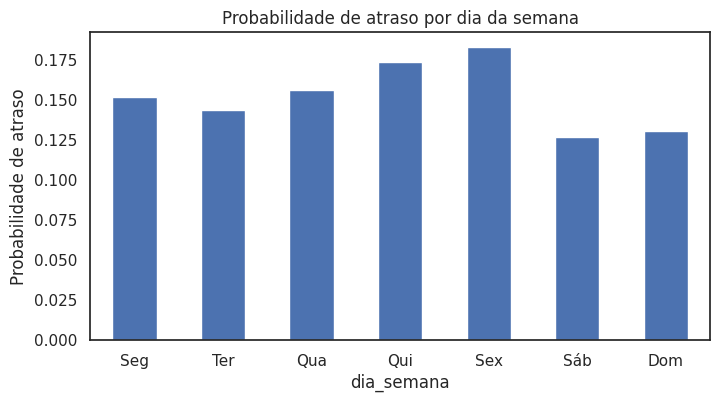

In [ ]:
dias = ["Seg", "Ter", "Qua", "Qui", "Sex", "Sáb", "Dom"]

taxa_atraso = (
    vra_nacional
    .groupby("dia_semana")["voo_com_atraso"]
    .mean()
)

plt.figure(figsize=(8,4))
taxa_atraso.plot(kind="bar")
plt.xticks(range(7), dias, rotation=0)
plt.title("Probabilidade de atraso por dia da semana")
plt.ylabel("Probabilidade de atraso")
plt.show()


#### **O atraso varia entre companhias? (Empresa aérea × atraso)**

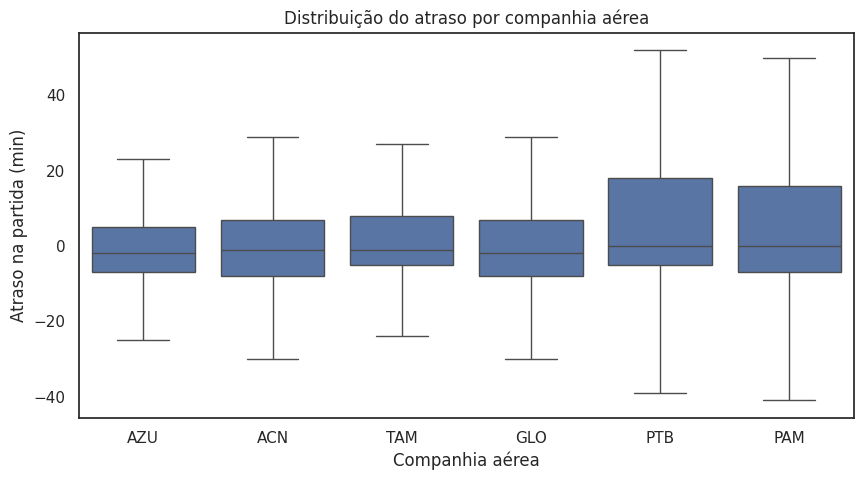

In [ ]:
top_cias = (
    vra_nacional["icao_empresa_aerea"]
    .value_counts()
    .head(6)
    .index
)

plt.figure(figsize=(10,5))
sns.boxplot(
    data=vra_nacional[vra_nacional["icao_empresa_aerea"].isin(top_cias)],
    x="icao_empresa_aerea",
    y="atraso_partida_min",
    showfliers=False
)
plt.title("Distribuição do atraso por companhia aérea")
plt.xlabel("Companhia aérea")
plt.ylabel("Atraso na partida (min)")
plt.show()


#### **Feriados realmente impactam atraso? (Feriado × atraso)**

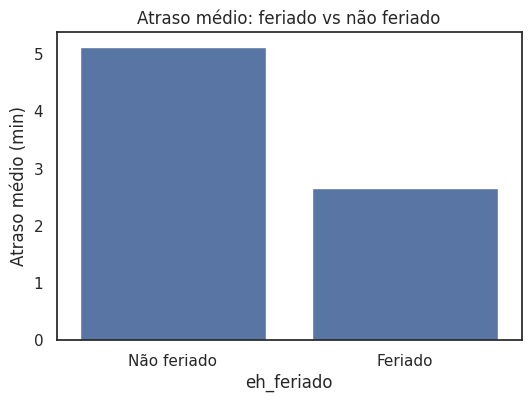

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=vra_nacional,
    x="eh_feriado",
    y="atraso_partida_min",
    estimator="mean",
    errorbar=None
)
plt.xticks([0,1], ["Não feriado", "Feriado"])
plt.title("Atraso médio: feriado vs não feriado")
plt.ylabel("Atraso médio (min)")
plt.show()


In [ ]:
vra_nacional.groupby("eh_feriado")["atraso_partida_min"].describe()

,count,mean,std,min,25%,50%,75%,max
eh_feriado,,,,,,,,
0,2147379.0,5.123782,42.831455,-59.0,-7.0,-2.0,7.0,44635.0
1,51926.0,2.651427,26.926808,-54.0,-8.0,-3.0,4.0,1110.0


| Métrica       | Não feriado | Feriado    |
| ------------- | ----------- | ---------- |
| Mediana (P50) | **-2 min**  | **-3 min** |
| P75           | **7 min**   | **4 min**  |
| P25           | -7 min      | -8 min     |
| Máx           | 4464        | 1110       |


A análise por quantis indica que feriados não estão associados a maior atraso na partida. Pelo contrário, tanto a mediana quanto o percentil 75 do atraso são menores em feriados, sugerindo operação mais previsível nesses dias. Assim, a variável `eh_feriado` apresenta baixo poder explicativo isolado para atraso.

#### **Vésperas de feriado impactam atraso?**

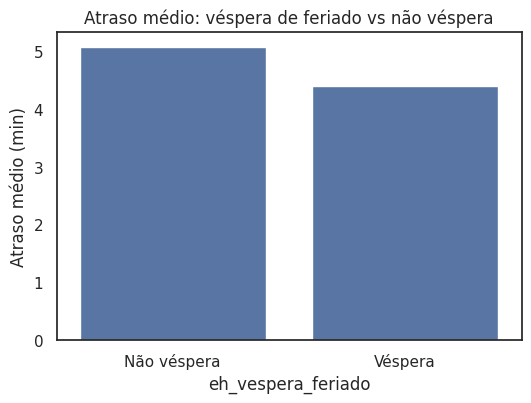

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=vra_nacional,
    x="eh_vespera_feriado",
    y="atraso_partida_min",
    estimator="mean",
    errorbar=None
)
plt.xticks([0,1], ["Não véspera", "Véspera"])
plt.title("Atraso médio: véspera de feriado vs não véspera")
plt.ylabel("Atraso médio (min)")
plt.show()

In [ ]:
vra_nacional.groupby("eh_vespera_feriado")["atraso_partida_min"].describe()


,count,mean,std,min,25%,50%,75%,max
eh_vespera_feriado,,,,,,,,
0,2146267.0,5.081937,42.780143,-59.0,-7.0,-2.0,7.0,44635.0
1,53038.0,4.396565,30.519975,-52.0,-7.0,-2.0,7.0,1453.0


Apesar da idéia inicial de que feriados e suas vésperas poderiam aumentar o atraso dos voos, a análise estatística mostrou distribuições praticamente idênticas em relação aos dias comuns. Isso sugere que o planejamento operacional das companhias aéreas absorve bem os efeitos de calendário, tornando essas variáveis pouco informativas para previsão de atraso

#### **Probabilidade de Atraso por compahia aérea**

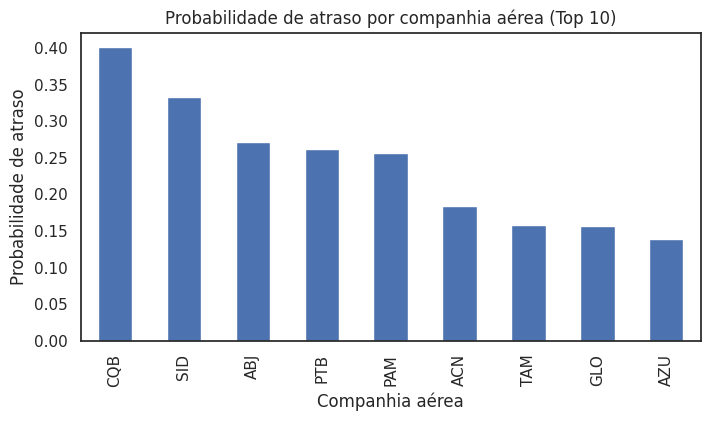

In [ ]:
top_cias = (
    vra_nacional["icao_empresa_aerea"]
    .value_counts()
    .head(10)
    .index
)

prob_atraso_cia = (
    vra_nacional[vra_nacional["icao_empresa_aerea"].isin(top_cias)]
    .groupby("icao_empresa_aerea")["voo_com_atraso"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,4))
prob_atraso_cia.plot(kind="bar")
plt.title("Probabilidade de atraso por companhia aérea (Top 10)")
plt.ylabel("Probabilidade de atraso")
plt.xlabel("Companhia aérea")
plt.show()


#### **Atrasos por mês e ano**

In [ ]:
mensal_ano = (
    vra_nacional
    .groupby(["ano", "mes"])
    .agg(
        taxa_atraso=("voo_com_atraso", "mean"),
        atraso_mediano=("atraso_partida_min", "median"),
        qtd_voos=("voo_com_atraso", "size")
    )
    .reset_index()
)

mensal_ano["taxa_atraso"] *= 100
mensal_ano


,ano,mes,taxa_atraso,atraso_mediano,qtd_voos
0,2023,1,17.397293,-1.0,66792
1,2023,2,17.306869,-1.0,56076
2,2023,3,13.706382,-2.0,63620
3,2023,4,14.002201,-2.0,59962
4,2023,5,10.309407,-2.0,64252
5,2023,6,14.491426,-1.0,61112
6,2023,7,13.921166,-1.0,67128
7,2023,8,17.244000,-1.0,65791
8,2023,9,15.974580,-1.0,61842
9,2023,10,22.506091,0.0,61570


#### **Taxa de atraso por mês (linhas por ano)**

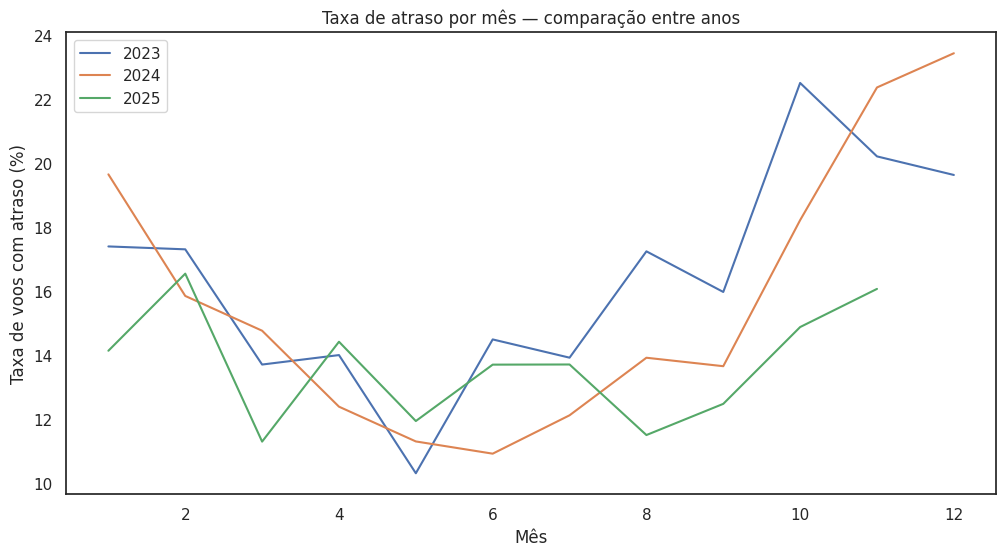

In [ ]:
plt.figure()

for ano in sorted(mensal_ano["ano"].unique()):
    df_plot = mensal_ano[mensal_ano["ano"] == ano]
    plt.plot(df_plot["mes"], df_plot["taxa_atraso"], label=str(ano))

plt.xlabel("Mês")
plt.ylabel("Taxa de voos com atraso (%)")
plt.title("Taxa de atraso por mês — comparação entre anos")
plt.legend()
plt.show()


Observa-se com base nesses dados uma redução gradual dos atrasos no primeiro semestre, com mínimo entre maio e junho, seguida de aumento progressivo a partir do terceiro trimestre, culminando em picos nos meses de outubro a dezembro - **indicando que o final de ano é a época onde ocorre o maior pico de demanda**. A repetição desse comportamento ao longo dos anos indica que o atraso está fortemente associado à sazonalidade operacional, e não a eventos pontuais como feriados ou vésperas.

#### **Volume de voos**

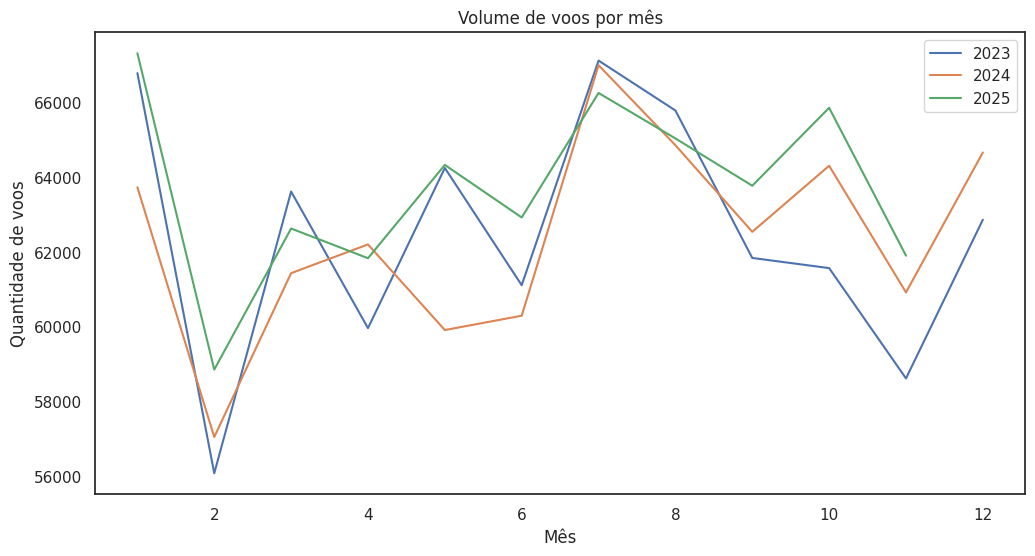

In [ ]:
plt.figure()

for ano in sorted(mensal_ano["ano"].unique()):
    df_plot = mensal_ano[mensal_ano["ano"] == ano]
    plt.plot(df_plot["mes"], df_plot["qtd_voos"], label=str(ano))

plt.xlabel("Mês")
plt.ylabel("Quantidade de voos")
plt.title("Volume de voos por mês")
plt.legend()
plt.show()



A análise conjunta do volume mensal de voos e da taxa de atraso indica que o aumento da demanda, por si só, não explica os atrasos. Embora meses como julho apresentem elevado volume de operações, os maiores níveis de atraso concentram-se no último trimestre do ano.

#### **Criação de feature de congestionamento operacional**

**Slot de aeroporto** é a autorização concedida para uma aeronave pousar ou decolar em um aeroporto movimentado (coordenado) em um horário específico, funcionando como uma "vaga" para organizar o fluxo e evitar congestionamentos, garantindo segurança e pontualidade, e é regulado por órgãos como a ANAC no Brasil, seguindo padrões internacionais da IATA.  

**Fonte:** https://pt.wikipedia.org/wiki/Slot_(avia%C3%A7%C3%A3o)

**Quantos voos estavam programados para o mesmo aeroporto de origem no mesmo horário (slot de 1 hora)?**

In [ ]:
# Criando slot horário diretamente no dataframe principal
vra_nacional["slot_hora"] = vra_nacional["partida_prevista"].dt.floor("h")

In [ ]:
# =====================================================
# Feature: volume de voos por aeroporto e slot horário
# =====================================================

vra_aux = vra_nacional[
    ["icao_aerodromo_origem", "slot_hora"]
].copy()



# Agrupando para obter volume de voos por aeroporto + slot

volume_slot = (
    vra_aux
    .groupby(["icao_aerodromo_origem", "slot_hora"])
    .size()
    .reset_index(name="voos_no_slot")
)


# Fazendo o merge de volta no dataframe principal
vra_nacional = vra_nacional.merge(
    volume_slot,
    on=["icao_aerodromo_origem", "slot_hora"],
    how="left"
)


In [ ]:
vra_nacional[["icao_aerodromo_origem", "slot_hora", "voos_no_slot"]]

,icao_aerodromo_origem,slot_hora,voos_no_slot
0,SBGR,2023-01-17 12:00:00,17
1,SBCT,2023-01-09 07:00:00,5
2,SBCT,2023-01-10 11:00:00,5
3,SBCT,2023-01-11 07:00:00,5
4,SBCT,2023-01-12 07:00:00,4
...,...,...,...
2199300,SBBR,2025-09-27 22:00:00,2
2199301,SBBR,2025-09-28 22:00:00,4
2199302,SBBR,2025-09-29 22:00:00,4
2199303,SBBR,2025-09-30 22:00:00,5


In [ ]:
vra_nacional["voos_no_slot"].describe()

,voos_no_slot
count,2.199305e+06
mean,8.595759e+00
std,7.280787e+00
min,1.000000e+00
25%,2.000000e+00
50%,6.000000e+00
75%,1.400000e+01
max,3.100000e+01


É possível perceber:

* Mediana = 6 voos por slot

* 75% dos slots têm até 14 voos

* Máximo = 31 voos no mesmo aeroporto, na mesma hora

* Distribuição assimétrica à direita (cauda longa)

#### **Distribuição de voos por slot (histograma)**

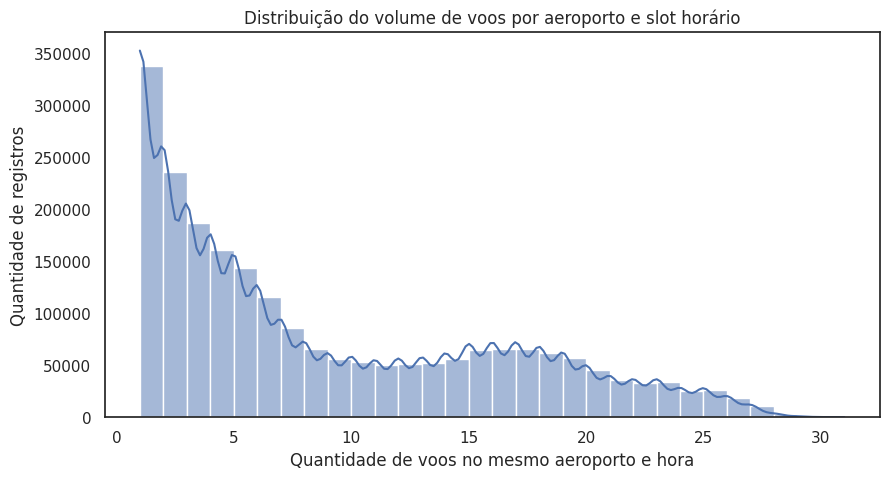

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(
    vra_nacional["voos_no_slot"],
    bins=30,
    kde=True
)
plt.title("Distribuição do volume de voos por aeroporto e slot horário")
plt.xlabel("Quantidade de voos no mesmo aeroporto e hora")
plt.ylabel("Quantidade de registros")
plt.show()


* Essa variável representa pressão operacional no aeroporto naquele horário.

#### Atraso médio vs volume de slot (relação direta)

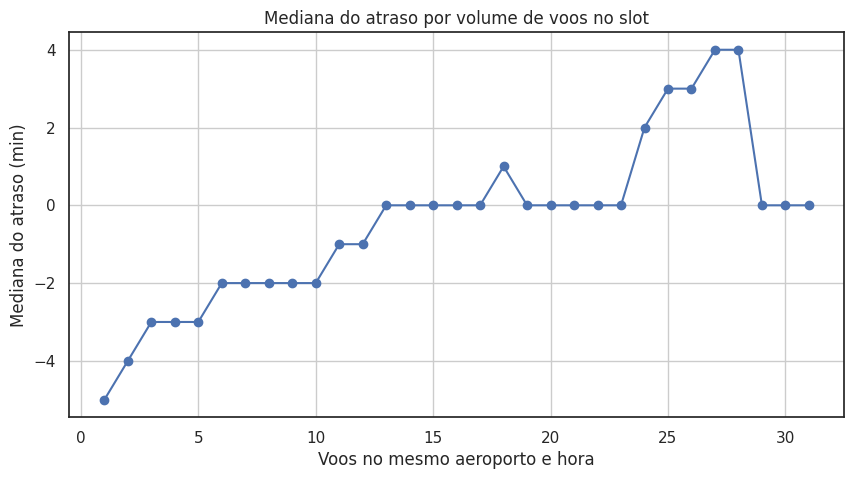

In [ ]:
slot_delay = (
    vra_nacional
    .groupby("voos_no_slot")["atraso_partida_min"]
    .median()
    .reset_index()
)

plt.figure(figsize=(10,5))
plt.plot(
    slot_delay["voos_no_slot"],
    slot_delay["atraso_partida_min"],
    marker="o"
)
plt.title("Mediana do atraso por volume de voos no slot")
plt.xlabel("Voos no mesmo aeroporto e hora")
plt.ylabel("Mediana do atraso (min)")
plt.grid(True)
plt.show()


## Próximos Passos

Com base na análise exploratória e nas validações estatísticas realizadas, foram identificadas variáveis operacionais e temporais com associação relevante à probabilidade de atraso de voos. As principais features foram selecionadas considerando não apenas seu poder explicativo, mas também a viabilidade de uso em um cenário de previsão real.

Como próximo passo, o projeto avança para um outro Notebook que irá adicionar uma variável de distância com base na localização geográfica dos aeródromos para enriquecer o dataset de modo que melhore a posterior criação do modelo.

In [ ]:
# Checkpoint do dataset

vra_nacional.to_parquet(
    "dataset_proprio_pt1.parquet",
    index=False
)